<a href="https://colab.research.google.com/github/riyaponraj/Image-classification/blob/main/Image_Classification_with_dataset_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION WITH CONVOLUTIONAL NEURAL NETWORK

In [ ]:
#import the required libraries
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
from keras.preprocessing import image
from sklearn import preprocessing
import datetime
from tensorflow.keras import datasets, layers, models


# Load the dataset

The given dataset has 50000 images with 10 categories.  80% dataset is used for training and 20% is used for validation

In [ ]:
#csv file of labels
import pandas as pd    
dat = pd.read_csv('C:/Users/Riya/Downloads/labels.csv')
dat

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [ ]:
#image dataset
images = []
for i in tqdm(range(dat.shape[0])):
    img = image.load_img('C:/Users/Riya/Downloads/images/train/'+str(dat['id'][i]) + '.png')
    img = image.img_to_array(img)
    img = img/255
    images.append(img)
X = np.array(images)

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [15:29<00:00, 53.80it/s]


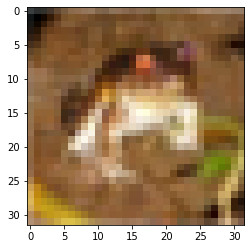

In [ ]:
plt.imshow(X[0])

To convert string of labels into integer values, I did this.

In [ ]:
 d = dict([e[:: -1] for e in enumerate(dat.label.unique())])
dat.label = dat.label.map(d)
dat

,id,label
0,1,0
1,2,1
2,3,1
3,4,2
4,5,3
...,...,...
49995,49996,4
49996,49997,0
49997,49998,1
49998,49999,3


In [ ]:
dat['label']

0        0
1        1
2        1
3        2
4        3
        ..
49995    4
49996    0
49997    1
49998    3
49999    3
Name: label, Length: 50000, dtype: int64

In [ ]:
#To convert the series of data into an array
y = pd.Series(dat['label'])
y=y.to_numpy()
# using to_numpy() function
y

array([0, 1, 1, ..., 1, 3, 3], dtype=int64)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, shuffle=False)

In [ ]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
y_train

array([0, 1, 1, ..., 0, 4, 6], dtype=int64)

In [ ]:
y_train[:5]

array([0, 1, 1, 2, 3], dtype=int64)

In [ ]:
def plot_sample(X, y, index):   #defining function for future use and code simplification
    plt.figure(figsize = (15,2)) # tuple of width and height
    plt.imshow(X[index])  #displays the grayscale image
    plt.xlabel(classes[y[index]])  #labelling X axis

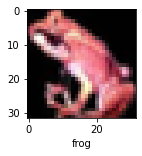

In [ ]:
plot_sample(X_train, y_train, 103)

# 5-layer CONVOLUTIONAL NEURAL NET

1) Sequential model- The common architecture of ConvNets is a sequential architecture.
2) Conv2D- 2D Convolution Layer which creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
3) MaxPooling2D- pooling operation that calculates the maximum, or largest, value in each patch of each feature map.
4) Flatten - flattens the input
5) Dense -  regular deeply connected neural network layer and does the below operation on the input and return the output.

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

'''rectified linear activation function or ReLu is a piecewise linear function that will output the input directly
if it is positive, otherwise, it will output zero. There will be no negative values as it converts all negative values 
into zero which is more helpful. It won't cause problems occurring with vanishing gradients. '''

"rectified linear activation function or ReLu is a piecewise linear function that will output the input directly\nif it is positive, otherwise, it will output zero. There will be no negative values as it converts all negative values \ninto zero which is more helpful. It won't cause problems occurring with vanishing gradients. "

In [ ]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

#adam - efficient algorithm for optimization technique, for gradient descent
#sparse_categorical_crossentropy-Computes the crossentropy loss between the labels and predictions

In [ ]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 155s 119ms/step - loss: 1.5143 - accuracy: 0.4561 - loss: 1.5156 - 
Epoch 2/10
1250/1250 [==============================] - 138s 110ms/step - loss: 1.1663 - accuracy: 0.5916
Epoch 3/10
1250/1250 [==============================] - 136s 109ms/step - loss: 1.0237 - accuracy: 0.6450 - loss: 1.0239 - accuracy: 0.
Epoch 4/10
1250/1250 [==============================] - 132s 106ms/step - loss: 0.9291 - accuracy: 0.6768
Epoch 5/10
1250/1250 [==============================] - 122s 97ms/step - loss: 0.8571 - accuracy: 0.7019 28s - loss:  - ETA: 26s - loss: 0.8594 - accuracy: 0.701 - ETA: 26s - ETA: 22s - - ETA: 
Epoch 6/10
1250/1250 [==============================] - 141s 113ms/step - loss: 0.8071 - accuracy: 0.7201
Epoch 7/10
1250/1250 [==============================] - 131s 105ms/step - loss: 0.7517 - accuracy: 0.7374 - l - ETA: 1s - loss: 0.7
Epoch 8/10
1250/1250 [==============================] - 54s 43ms/step - loss: 0.7060 - accuracy:

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0169 - accuracy: 0.6693


[1.0169129371643066, 0.6693000197410583]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.7288771e-08, 6.4203596e-05, 2.9189271e-04, 9.9876344e-01,
        5.3346757e-06, 2.7191797e-08, 6.1777449e-04, 8.6735217e-06,
        8.1944478e-08, 2.4868787e-04],
       [6.7027198e-05, 1.4596972e-02, 3.0508731e-05, 1.2137677e-03,
        6.2248373e-04, 1.4829754e-05, 8.7613082e-01, 3.2948551e-04,
        6.6769702e-05, 1.0692739e-01],
       [1.4157475e-03, 3.8851845e-06, 1.5633772e-04, 5.9489224e-08,
        1.1561851e-02, 2.3290918e-06, 4.0248278e-06, 9.7252809e-02,
        8.8960296e-01, 2.9966341e-08],
       [3.4943218e-07, 2.0160271e-02, 2.9424581e-07, 9.7628409e-01,
        9.8425640e-05, 6.9988287e-06, 3.3614347e-03, 9.0729518e-06,
        1.4587313e-05, 6.4439511e-05],
       [1.2236751e-02, 8.2819164e-03, 1.2796527e-01, 1.1919672e-03,
        4.0056963e-02, 2.2672005e-01, 2.9082382e-03, 2.1886791e-01,
        3.6122698e-01, 5.4390408e-04]], dtype=float32)

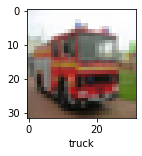

In [ ]:
plot_sample(X_test, y_test,100)

# Displaying the results for 100 randomly selected images from the validaion set in a 10x10 grid fashion with each row representing images from one specific class

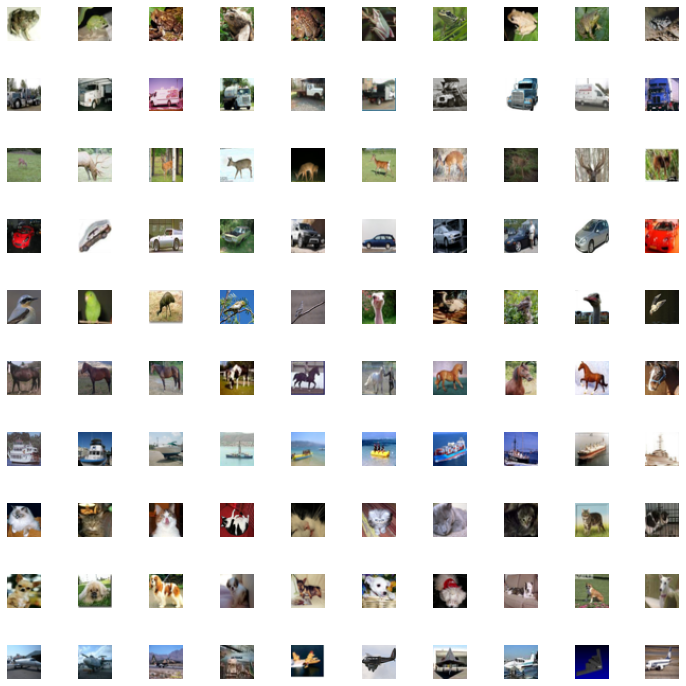

In [ ]:
import random
num_of_samples = []
 
cols = 10
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(10,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title('')
            num_of_samples.append(len(x_selected))